Dataset loaded successfully
Shape: (36520, 7)
   Temperature   Humidity  Soil_Quality  Crop_Type  NPK_Ratio  \
0     9.440599  80.000000     22.833333          9   0.790850   
1    20.052576  79.947424     66.666667          1   0.724138   
2    12.143099  80.000000     27.333333          4   0.772973   
3    19.751848  80.000000     35.000000          0   0.714286   
4    16.110395  80.000000     22.166667          5   0.592814   

   Fertility_Index  Crop_Yield  
0       159.833333    0.000000  
1       266.666667  104.871310  
2       191.333333    0.000000  
3       155.000000   58.939796  
4       155.166667   32.970413  
Model Performance
Mean Squared Error: 22.228194720914015
R2 Score: 0.966665771846948
Feature Importance Table
             Feature  Importance
0        Temperature    0.572481
1           Humidity    0.173122
2       Soil_Quality    0.102788
5  Crop_Type_encoded    0.067643
3          NPK_Ratio    0.043194
4    Fertility_Index    0.040772


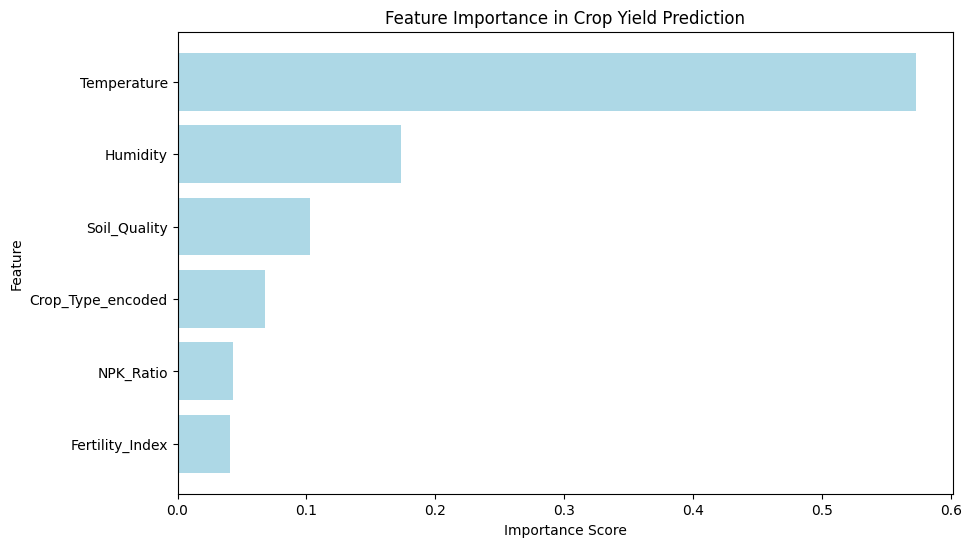

In [2]:
# Crop Yield Feature Importance - Simple Version

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("data/crop_yield_predicted.csv")  # use your actual dataset

# Display basic info
print("Dataset loaded successfully")
print("Shape:", df.shape)
print(df.head())

# Encode Crop_Type if it exists
from sklearn.preprocessing import LabelEncoder
if 'Crop_Type' in df.columns:
    le = LabelEncoder()
    df['Crop_Type_encoded'] = le.fit_transform(df['Crop_Type'])

# Define features and target
X_cols = ['Temperature', 'Humidity', 'Soil_Quality', 'NPK_Ratio', 'Fertility_Index']
if 'Crop_Type_encoded' in df.columns:
    X_cols.append('Crop_Type_encoded')

X = df[X_cols]
y = df['Crop_Yield']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Feature importance
importance = model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance table
print("Feature Importance Table")
print(feat_imp)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='lightblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance in Crop Yield Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
